# Author Identification
#### Carl Moser, Matthew Beaudouin-Lafon

We did stuff to do things with doodas.

In [5]:
from thinkbayes2 import Suite
from pickle import load
import thinkplot

def getPickle(fileName):
    infile = open('DATs/' + fileName, 'rb+')
    chain = load(infile)
    wordCount = load(infile)
    author = load(infile)
    infile.close()
    return (chain, wordCount, author)

class AuthorId(Suite):
    """
    Bayesian model for author identification. Uses Markov chains generated from texts who's authors are known as a likelihood function.
    Has a list of {author : MarkovChain objects}
    """
    def __init__(self):
        self.markovChains = {}
        self.totalWords = 0
        Suite.__init__(self)
    
    def isWorthChecking(self, word):
        worth = True
        for author, prob in self.Items():
            wordCount = self.markovChains[author][1]
            worth = worth and bool(wordCount.get(word))
        return worth
                
    def Likelihood(self, data, hypo):
        """
        data: (string, string)
        hypo: (Markov Chain, Word Count dictionary, Author)
        """
        hypoAuthor = hypo
        chain, wordCount = self.markovChains[hypoAuthor]
        word = data
            
        return wordCount[word]

In [6]:
files = ['Frankenstein.dat', 'GreatExpectations.dat', 'RomeoAndJuliet.dat', 'MobyDick.dat', "The Hitch Hiker's Guide to the Galaxy.dat", 'Twilight.dat']

authorId = AuthorId()

for file in files:
    chain, wordCount, author = getPickle(file)
    authorId[author] = 1
    authorId.markovChains[author] = (chain, wordCount)
    authorId.totalWords = sum(wordCount.values())

In [12]:
f = open('testText.dat', 'rb')
testText = load(f)
f.close()

In [13]:
for author, prob in authorId.Items():
    authorId[author] = 1
    
authorId.Normalize()
maryV = []
charlesV = []
shakeV = []
totalWords = 0
for sentence in testText:
    sentence = ['*'] + sentence
    for word in sentence:
        totalWords += 1
        if authorId.isWorthChecking(word):
            authorId.Update(word)
            authorId.markovChains[]
            
        maryV.append(authorId['Mary Shelley'])
        charlesV.append(authorId['Charles Dickens'])
        shakeV.append(authorId['Shakespeare'])
        
authorId.Print()

Charles Dickens 4.860197789227251e-43
Douglas Adams 0.0
Herman Melville 1.0
Mary Shelley 6.334662243176631e-212
Shakespeare 1.5844206093958314e-246
Stephenie Meyer 9.450347529934758e-162


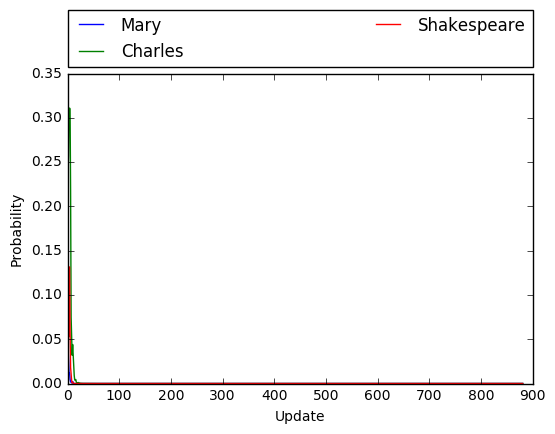

In [14]:
import matplotlib.pyplot as plt

#for i in (shakeV):
#    print(str(i) + ', ')
x = range(0, len(maryV))
plt.xlabel('Update')
plt.ylabel('Probability')
plt.plot(x, maryV, label='Mary')
plt.plot(x, charlesV, label='Charles')
plt.plot(x, shakeV, label='Shakespeare')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()
# for fuck, shit in zip(maryV, charlesV):
#     print(fuck, shit)
# authorId

In [9]:
chainC = authorId.markovChains['Charles Dickens'][0]
countC = authorId.markovChains['Charles Dickens'][1]

print(countC['can']/float(sum(countC.values())))

0.000672185089417


Questions:
    - What to do with words that aren't there?
    - "To" appears a lot more than other words. Should it be weighed differently?
    - Integrate sentence lengths